In [1]:
import json, sys, random
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

/Users/eddoha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from PIL import Image, ImageDraw 

In [4]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [5]:
# download dataset from json object
f = open('shipsnet.json')
dataset = json.load(f)
f.close()

In [6]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [7]:
input_data

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

INPUT

In [8]:
input_data.shape

(4000, 19200)

The dataset contains 4000 images. One image is represented as a vector of length 19200 elements.

In [9]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [10]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

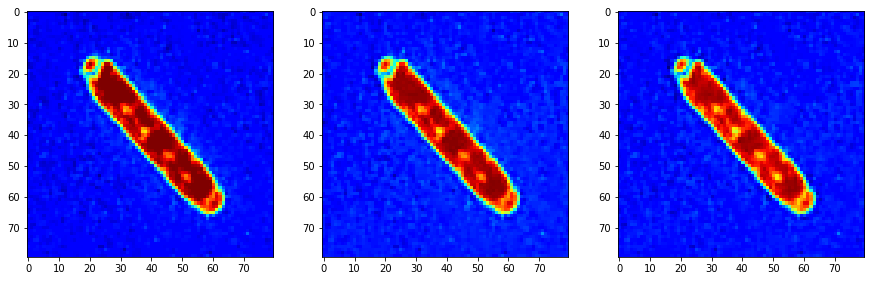

In [11]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

In [12]:
output_data.shape

(4000,)

The output is a vector of lenght 4000 elements.

The vector contains int 0 and 1

In [13]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [14]:
np.bincount(output_data)

array([3000, 1000])

Vector contains of 3000 zeros and 100 units. This means that in a dataset of 1000 images tagged with "ship" and 3000 images marked as "not ship".

### Preparing data

In [15]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [16]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [17]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [18]:
# normalization
X_train = X_train / 255

### Traing network

In [19]:
np.random.seed(42)

In [20]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 2240 samples, validate on 560 samples
Epoch 1/18
 - 33s - loss: 0.3892 - acc: 0.8201 - val_loss: 0.1665 - val_acc: 0.9357
Epoch 2/18
 - 28s - loss: 0.1559 - acc: 0.9433 - val_loss: 0.1032 - val_acc: 0.9589
Epoch 3/18
 - 28s - loss: 0.1241 - acc: 0.9589 - val_loss: 0.0956 - val_acc: 0.9607
Epoch 4/18
 - 31s - loss: 0.0880 - acc: 0.9696 - val_loss: 0.0790 - val_acc: 0.9679
Epoch 5/18
 - 31s - loss: 0.0740 - acc: 0.9728 - val_loss: 0.0829 - val_acc: 0.9714
Epoch 6/18
 - 31s - loss: 0.0656 - acc: 0.9835 - val_loss: 0.0568 - val_acc: 0.9750
Epoch 7/18
 - 34s - loss: 0.0606 - acc: 0.9835 - val_loss: 0.0882 - val_acc: 0.9661
Epoch 8/18
 - 34s - loss: 0.0519 - acc: 0.9835 - val_loss: 0.1246 - val_acc: 0.9625
Epoch 9/18
 - 35s - loss: 0.0690 - acc: 0.9763 - val_loss: 0.0618 - val_acc: 0.9839
Epoch 10/18
 - 29s - loss: 0.0427 - acc: 0.9857 - val_loss: 0.0550 - val_acc: 0.9804
Epoch 11/18
 - 37s - loss: 0.0408 - acc: 0.9888 - val_loss: 0.03

# Using network

### download image

In [24]:
image = Image.open('sfbay_1.png')
pix = image.load()

In [25]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [26]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [27]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

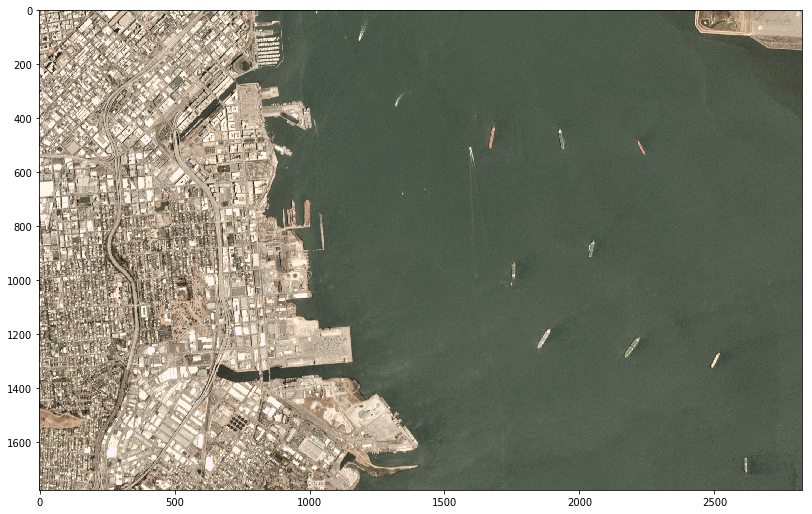

In [28]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [29]:
picture_tensor = picture_tensor.transpose(2,0,1)

### Search on the image

In [30]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [31]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [32]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:820 Y:270  [[0.06999532 0.9300047 ]]


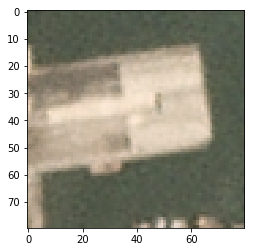

X:1640 Y:420  [[1.7100120e-04 9.9982893e-01]]


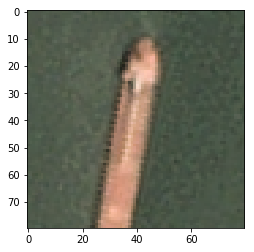

X:1890 Y:420  [[0.02826986 0.9717301 ]]


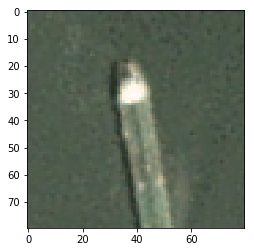

X:2190 Y:470  [[1.7365523e-06 9.9999821e-01]]


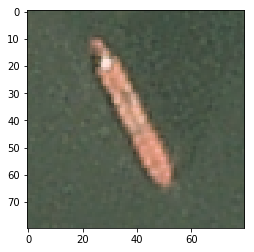

X:950 Y:690  [[0.04216304 0.957837  ]]


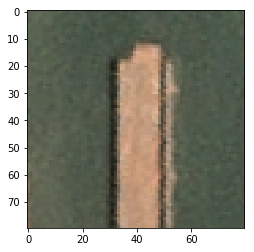

X:1010 Y:780  [[0.00202454 0.9979754 ]]


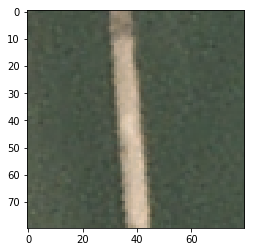

X:2000 Y:840  [[0.09818364 0.9018163 ]]


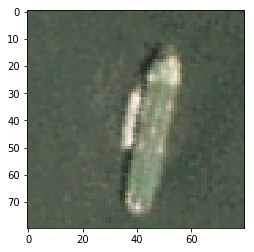

X:1720 Y:920  [[9.0344425e-04 9.9909663e-01]]


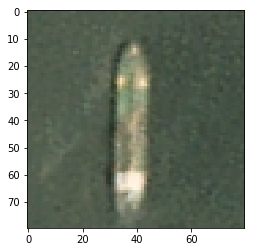

X:1840 Y:1160  [[0.0448795  0.95512056]]


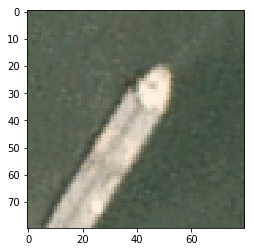

X:2160 Y:1200  [[0.00185094 0.99814904]]


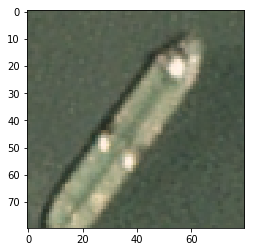

X:2470 Y:1250  [[0.06084189 0.9391581 ]]


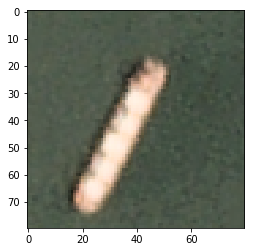

X:2580 Y:1640  [[0.01080567 0.9891943 ]]


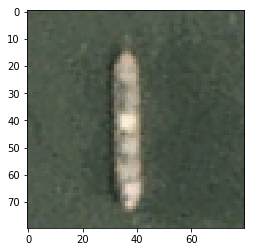

X:1300 Y:1650  [[0.08438809 0.91561186]]


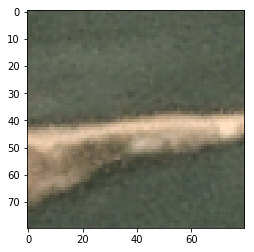

X:2740 Y:1690  

In [33]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [34]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [35]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

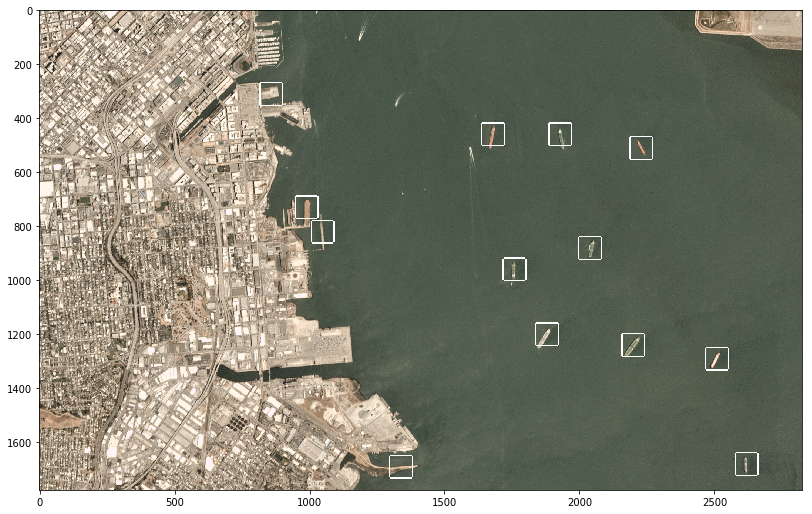

In [36]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()